In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks/인사교_머신러닝/DL (딥러닝)/언어지능

/content/drive/MyDrive/Colab Notebooks/인사교_머신러닝/DL (딥러닝)/언어지능


In [ ]:
data = open("./data/modi_output.txt", "r", encoding="utf-8")

In [ ]:
lines = data.readlines() # 모든 줄을 읽어와서, 각 줄을 리스트형으로 저장

In [ ]:
lines[4]

'강원의 주류 기술지식 영역과 전략산업을 살펴보면 웰니스식품, 스포츠지식서비스, 의료기기, 바이오활성소재 등은 밀접한 연관성을 갖고 있다. 연계 전환이 가지는 한계를 감안하더라도, 강원의 오랜 산업기반인 식품과 천연자원에 기반을 둔 웰니스식품, 바이오활성소재 등이 주류 기술지식 영역에 자리하고 있다는 사실은 당연한 결과로 이해된다. 의료기기의 경우에는 지역산업정책의 추진 초기부터 적극적으로 육성한 산업이기 때문에 강원의 주류 기술지식 영역으로 토대가 만들어져 왔다고 볼 수 있으며, 이는 지역산업정책 추진의 성과로 보는 것이 합당할 것이다. 특히 강원의 가상적 산업 구조에서 의료용 기기 제조업, 의료용 물질 및 의약품 제조업이 상당한 비중을 차지하고 있다는 점에서 산업기술지형과 전략산업 간의 정합성이 높은 산업 부문으로 해석 할 수 있다. 스포츠지식서비스의 경우에는 관련 기술지식 영역이 주로 소프트웨어 개 발 및 공급, 통신업 등으로 구성되어 있어 스포츠 부문에 특정되지는 않지만 전략산업 지정을 통해 스포츠 부문에서의 활용도를 높이는 방향으로 정책 추진이 가능할 것으로 사료된다. 다만 전략산업의 명칭과 실제 해당 산업코드와의 밀착성은 높다고 볼 수는 없다.\t강원의 주류 기술지식과 전략산업에는 웰니스식품, 스포츠지식서비스, 의료기기, 바이오활성소재가 있다. 웰니스식품, 바이오활성소재는 강원의 오랜 산업기반인 식품과 천연자원에 기반을 둔 결과이고 의료기기는 지역산업정책 추진의 성과이다. 스포츠지식서비스는 전략산업 지정을 통해 활용도를 높이도록 정책 추진을 할 수 있다.\n'

In [ ]:
passages = [] # 본문 담을 리스트
summaries = [] # 요약문 담을 리스트

for line in lines :
  line = line.strip() # 공백 제거

  # 탭을 기준으로 첫번째 부분 가져온 다음에 <s></s>를 추가하고 passages에 추가
  passages.append("<s>" + line.split("\t")[0] + "</s>")

  # 탭을 기준으로 2번째 부분 가져온 다음에 <s></s>를 추가하고 summaries에 추가
  summaries.append("<s>" + line.split("\t")[1] + "</s>")

In [27]:
data.close() # 자원 반납

### 전처리
- 이모지 제거, 클리닝, 띄워쓰기 교정 등

In [ ]:
!git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git
%cd Mecab-ko-for-Google-Colab
!bash install_mecab-ko_on_colab_light_220429.sh

Cloning into 'Mecab-ko-for-Google-Colab'...
remote: Enumerating objects: 138, done.
remote: Counting objects: 100% (47/47), done.
remote: Compressing objects: 100% (38/38), done.
remote: Total 138 (delta 26), reused 22 (delta 8), pack-reused 91 (from 1)
Receiving objects: 100% (138/138), 1.72 MiB | 4.46 MiB/s, done.
Resolving deltas: 100% (65/65), done.
/content/drive/MyDrive/Colab Notebooks/인사교_머신러닝/DL (딥러닝)/언어지능/Mecab-ko-for-Google-Colab
Installing konlpy.....
Done
Installing mecab-0.996-ko-0.9.2.tar.gz.....
from https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
--2024-09-20 05:31:24--  https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
Resolving bitbucket.org (bitbucket.org)... 104.192.142.25, 104.192.142.24, 104.192.142.26, ...
Connecting to bitbucket.org (bitbucket.org)|104.192.142.25|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://bbuseruploads.s3.amazonaws.com/eunjeon

In [ ]:
!pip install konlpy emoji kiwipiepy

In [ ]:
import re
from tqdm.auto import tqdm as tq # 반복현황 출력 도구(auto는 성능이 좀 더 좋음)
import emoji
from konlpy.tag import Mecab
from kiwipiepy import Kiwi

from kiwipiepy.utils import Stopwords

In [18]:
# 정규 표현식 패턴
p = re.compile("[ㅋㅎㄷㅇ~!?, -ㅡ0-9a-zA-Z]+")

# 불용어제거, 띄어쓰기 교정하는 객체들 초기화
kiwi = Kiwi()
stopwords = Stopwords()
mecab = Mecab()

In [19]:
# 이모지 제거 함수
def remove_emoji(text):
    return emoji.replace_emoji(text, replace='')

# 텍스트 클리닝 및 형태소 분석 함수
def clean_and_tokenize(text):
    text = " ".join([token for token in text.split() if not p.search(token)])
    text = remove_emoji(text)
    tokens = kiwi.tokenize(text, stopwords=stopwords)
    clean_text = " ".join([token.form for token in tokens])
    corrected_text = kiwi.space(clean_text)
    morphs = mecab.morphs(corrected_text)
    return " ".join(morphs)

# 데이터를 처리하는 함수
def preprocess_data(dataset):
    preprocessed_data = []
    for doc in tq(dataset):
        cleaned_doc = clean_and_tokenize(doc)
        preprocessed_data.append(cleaned_doc)
    return preprocessed_data

In [20]:
# 데이터셋 병함
summary_dataset = passages + summaries

In [21]:
len(summary_dataset)

320004

In [22]:
# 원문 데이터셋이 약 32만개 -> 전부 전처리 수행 시 약 3시간 걸림
# 5000로 줄여서 전처리해서 실습에 사용
kor_tokenzed_doc = preprocess_data(summary_dataset[:5000])

  0%|          | 0/5000 [00:00<?, ?it/s]

### 토큰화 + 수치화 수행

In [23]:
from tensorflow.keras.preprocessing.text import Tokenizer
# 텐서플로우에서 제공하는 텍스트 전처리 도구

tokenizer = Tokenizer()

# 각 단어에 고유한 인덱스 번호를 할당(단어사전 만듬)
tokenizer.fit_on_texts(kor_tokenzed_doc)

In [24]:
# 단어사전 확인
word2idx = tokenizer.word_index # {단어 : 인덱스번호}

In [26]:
idx2word = {value : key for key, value in word2idx.items()} # {인덱스번호:단어}

In [28]:
# 전처리된 문장들을 인덱스 번호(수치형)으로 변환
encoded = tokenizer.texts_to_sequences(kor_tokenzed_doc) # 텍스트 문장을 숫자로 이루어진 시퀀스로 반환

encoded[0]

[516,
 93,
 854,
 577,
 559,
 147,
 6025,
 4,
 33,
 108,
 516,
 3752,
 1372,
 854,
 4,
 5486,
 915,
 9814,
 845,
 1251,
 4,
 262,
 981,
 125,
 6026,
 1206,
 476,
 3204,
 981,
 1652,
 408,
 229,
 4,
 5029,
 854,
 1014,
 3752,
 1437,
 3752,
 516,
 319,
 1437,
 5487,
 130,
 516,
 3752,
 3752,
 1014,
 1653,
 86,
 1054,
 106,
 883,
 888,
 7918,
 2441,
 120,
 78,
 58,
 322,
 2887,
 584,
 491,
 1191,
 6784,
 854,
 654,
 3752,
 17,
 1251,
 2793,
 1614,
 60,
 22,
 2391,
 408,
 233,
 37,
 1654,
 2793,
 2793,
 1614,
 3752,
 17,
 4689,
 1614,
 60]

In [29]:
# 단어사전 크기 지정
vocab_size = len(word2idx) + 1
vocab_size
# 보통 NLP 모델에서는 0번 인덱스를 패딩 값으로 사용하는 경우가 많음

14569

#### Word2Vec
- 단어 임베딩 방법론 중 하나 (외에도 fasttext, glove 등)
- 두 가지 방법
  - CBOW : 주변 단어들로 중심 단어를 학습 / 예측하는 방법
  - SkipGram : 중심 단어들로 주변 단어를 학습 / 예측하는 방법

---

##### Skipgram + Nagative Sampling (SGNS)
- 보통 임베딩 품질 : CBOW < Skipgram < SGNS
  - Nagative Sampling : Skipgram 모델에서 효율적으로 학습하기 위한 샘플링 기법
  - 진짜 주변 단어(양성샘플)와 가짜 주변 단어(음성샘플)를 가지고 학습을 수행

In [30]:
from tensorflow.keras.preprocessing.sequence import skipgrams # 스킵그램 모델(word2vec에 필요한 데이터 쌍 만들 때 사용하는 도구)

In [32]:
# 학습에 필요한 중심단어와 주변단어 쌍 생성

temp = skipgrams(
    encoded[0],
    vocabulary_size = vocab_size, # 등록된 단어사전 개수 지정
    window_size = 10 # 중심단어로부터 주변 단어를 선정할 개수 기준
)

In [34]:
len(temp)
# 0번째 리스트 : 단어쌍 리스트 -> [중심단어, 주변단어], [중심단어, 주변단어]....
# 1번째 리스트 : 양성(진짜 주변 단어)/ 음성(가짜 주변 단어) 레이블

2

In [35]:
temp[1][2]

0

In [36]:
# 5개 확인
temps = [skipgrams(sample, vocabulary_size = vocab_size, window_size = 10) for sample in encoded[:5]]

In [41]:
# 0번찌 샘플의 단어 쌍과 레이블(양성/음성) 확인
pairs = temps[0][0]
labels = temps[0][1]

len(pairs), len(labels)

(3260, 3260)

In [43]:
# 어떠한 중심단어와 주변단어인지, 그리고 라벨은 무엇인지 확인
for i in range(len(temps)) :
  print(f"{idx2word[pairs[i][0]]} ({pairs[i][0]}), {idx2word[pairs[i][1]]} ({pairs[i][1]}) -> {labels[i]}")
  # pairs[i][0] : 중심 단어의 인덱스
  # pairs[i][1] : 주변 단어의 인덱스

이해 (408), 설득 (2793) -> 1
명쾌 (6026), 존 (915) -> 1
사실 (233), 해치 (4689) -> 1
쓰 (1014), 귀중품 (12096) -> 0
글 (1437), 은하 (11832) -> 0


In [45]:
# word2vec의 데이터셋 만들기
training_dataset = [skipgrams(sample, vocabulary_size = vocab_size, window_size = 10) for sample in tq(encoded[:50])]
# 데이터셋 자체는 시간이 안 걸림
# word2vec 학습을 수행할 때 시간이 많이 걸림

  0%|          | 0/50 [00:00<?, ?it/s]

#### word2vec 모델 구현

In [46]:
from tensorflow.keras.models import Sequential, Model
# Model : 입력과 출력을 정의해서 커스텀 모델을 만들 때 사용

from tensorflow.keras.layers import Embedding, Reshape, Activation, Input, Dot
# Embedding : 단어를 고정된 크기의 벡터로 변환하는 레이어
# Reshape : 특정 모양으로 변환하는 레이어
# Dot : 중심 단어랑 주변 단어 간의 연관성을 계산할 때 사용(내적 벡터 계산, dot product)

from tensorflow.keras.utils import plot_model # 모델 구조 시각화 도구
from IPython.display import SVG # 벡터 기반 이미지 형식

import numpy as np

In [48]:
# 임베딩 벡터 차원 설정
embedding_dim = 100 # 각 단어들은 100개의 차원으로 벡터화

# 1. 중심단어 입력 & 임베딩을 위한 Layer 설정
# 입력 정의(중심단어)
w_inputs = Input(
    shape = (1, ), # 한번에 하나의 단어 인덱스를 입력 받음
    dtype = "int32"
    )

In [49]:
word_embedding = Embedding(
    vocab_size, # 단어 사전 크기 지정
    embedding_dim # 임베딩 차원수
)(w_inputs) # 입력받고, 임베딩 레이어를 적용(100차원의 벡터로 변환)시킨다!

# 케라스에서 제공하는 함수형 API

In [50]:
word_embedding

<KerasTensor shape=(None, 1, 100), dtype=float32, sparse=False, name=keras_tensor_2>

In [51]:
# 2. 주변단어 입력 & 임베딩을 위한 Layer 설정
# 입력 정의(주변단어)
c_inputs = Input(
    shape = (1, ), # 한번에 하나의 단어 인덱스를 입력 받음
    dtype = "int32"
    )

In [52]:
context_embedding = Embedding(
    vocab_size, # 단어 사전 크기 지정
    embedding_dim # 임베딩 차원수
)(c_inputs) # 입력받고, 임베딩 레이어를 적용(100차원의 벡터로 변환)시킨다!

# 케라스에서 제공하는 함수형 API

In [53]:
# 3. 중심단어, 주변단어들의 임베딩 벡터를 dot product(내적계산, 연관성을 계산)를 계산을 수행하는 layer
dot_product = Dot(axes = 2)([word_embedding, context_embedding]) # 유사도를 측정하는 layer

In [54]:
# 4. 내적 결과를 1차원으로 변환, sigmoid 적용
dot_product = Reshape((1,), input_shape = (1, 1))(dot_product)

# 출력결과를 두 단어 사이가 연관될 확률값(시그모이드 출력값)으로 변경
output = Activation("sigmoid")(dot_product)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [56]:
# 5. 전체 모델을 정의
model = Model(inputs = [w_inputs, c_inputs], outputs = output) # 입력 부분과 출력 부분만 설정해주면 끝!

In [57]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 1)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_2             │ (None, 1)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding (Embedding)     │ (None, 1, 100)         │      1,456,900 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_1 (Embedding)   │ (None, 1, 100)         │      1,456,900 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dot (Dot)                 │ (None, 1, 1)           │              0 │ embedding[0][0],       │
│                           │                        │                │ embedding_1[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ reshape (Reshape)         │ (None, 1)              │              0 │ dot[0][0]              │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation (Activation)   │ (None, 1)              │              0 │ reshape[0][0]          │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 2,913,800 (11.12 MB)

 Trainable params: 2,913,800 (11.12 MB)

 Non-trainable params: 0 (0.00 B)

In [58]:
!pwd

/content/drive/MyDrive/Colab Notebooks/인사교_머신러닝/DL (딥러닝)/언어지능


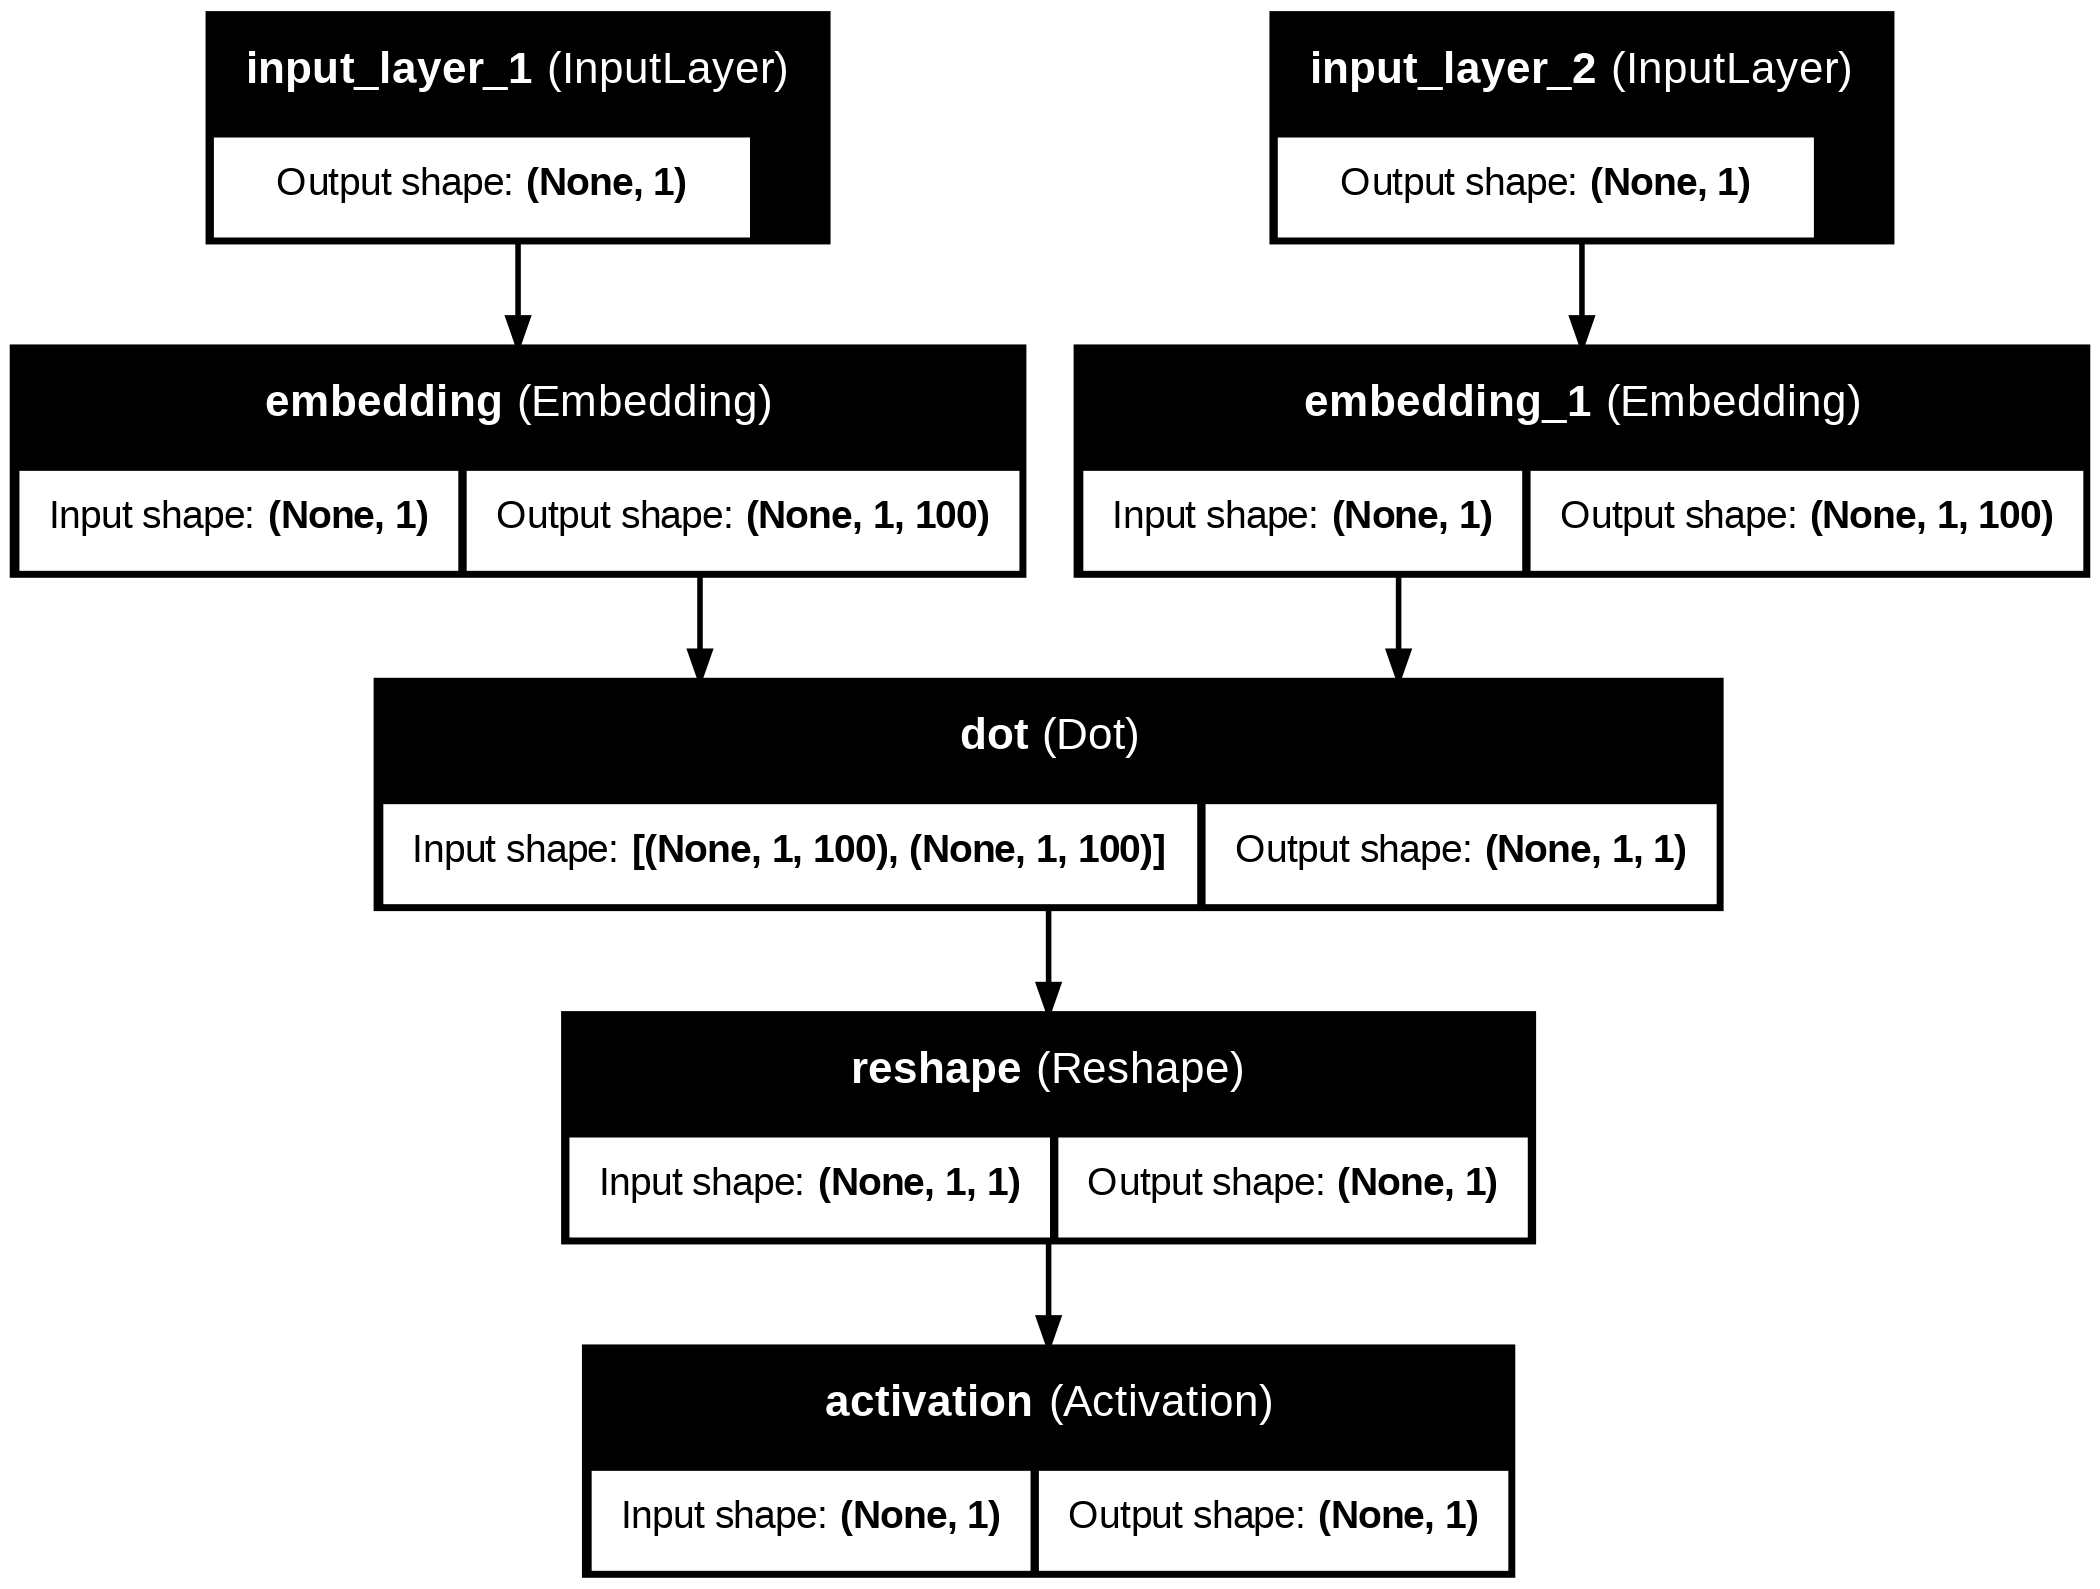

In [60]:
# 학습 방법 설정
model.compile(
    loss = "binary_crossentropy", # 시그모이드 출력값에 사용되는 손실함수
    optimizer = "adam"
)
# 매트릭스는 설정 안 함

# 모델 구조 시각화
plot_model(
    model,
    to_file = "./data/model.png",
    show_shapes = True, # 각 layer들의 출력 형태를 표시할지 여부
    show_layer_names = True, # 레이어의 이름 표시할지 여부
    rankdir = "TB" # 모델 구조 방향 설정(TB : 위에서 아래로)
)

In [61]:
# 학습 수행
for epoch in tq(range(5)): # epoch 수
    loss = 0 # 오차값 달아둘 변수 초기화
    for elem in training_dataset: # 각 요소만큼 반복
        first_elem = np.array(list(zip(*elem[0]))[0], dtype='int32') # 중심 단어 추출
        second_elem = np.array(list(zip(*elem[0]))[1], dtype='int32') # 주변 단어 추출
        labels = np.array(elem[1], dtype='int32') # 양성, 음성
        X = [first_elem, second_elem] # 문제
        Y = labels # 정답
        loss += model.train_on_batch(X, Y)
    print('Epoch :', epoch + 1, 'Loss :', loss)


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch : 1 Loss : 34.65541923046112
Epoch : 2 Loss : 34.59525549411774
Epoch : 3 Loss : 34.415742099285126
Epoch : 4 Loss : 33.785149931907654
Epoch : 5 Loss : 32.22087222337723
